## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！
#### 如果target為等距變項，使用LinearRegression
#### 如果target為類別變項，使用LogisticRegression

In [1]:
# 載入套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
def printdataset(datas):
    for i in datas:
        print(i,datas[i])
        
def skdatasetToPandas(datas):
    if 'target_names' in datas:
        DataDF = pd.DataFrame(datas.data,columns=datas.feature_names)
        TargetDF = pd.Series(datas.target).apply(lambda x:datas.target_names[x])
        TargetDF.name='Target'
        RawDF = pd.concat([DataDF,TargetDF],axis=1)
    else:
        RawDF = pd.concat([pd.DataFrame(datas.data,columns=datas.feature_names),pd.DataFrame(datas.target,columns=['Target'])],axis=1)
    return RawDF

In [2]:
#載入測試資料集
wine = datasets.load_wine()
#印出資料集
print(skdatasetToPandas(wine).head())
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)
# 建立模型
logreg = linear_model.LogisticRegression()
# logreg = linear_model.LinearRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)
#正確性分析
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline   Target  
0         

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  
Coefficients:  [-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01]
Mean squared error: 17.04


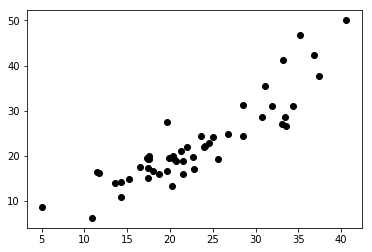

In [3]:
boston = datasets.load_boston()
#印出資料集
print(skdatasetToPandas(boston).head())
x_train,x_test,y_train,y_test=train_test_split(boston.data,boston.target,test_size=0.1,random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# 畫出回歸模型與實際資料的分佈
plt.scatter(y_pred, y_test,  color='black')

# plt.plot(y_pred,y_test, color='blue', linewidth=3)
plt.show()


In [4]:
breast = datasets.load_breast_cancer()
#印出資料集
print(skdatasetToPandas(breast).head())
x_train,x_test,y_train,y_test = train_test_split(breast.data,breast.target,test_size=0.1,random_state=4)

logreg = linear_model.LogisticRegression()

logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

Acc =accuracy_score(y_test,y_pred)
Acc

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension    ...      worst texture  worst perimeter  \
0                 0.

0.8771929824561403